In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
tv_usage_info = pd.read_csv("data/PEO TV usage Information.csv")
tv_usage_info

,Phone Number,Phone Number.hash,Peo TV Package,usage_08_20 (hh:mm),usage_07_20 (hh:mm),usage_06_20 (hh:mm),usage_05_20 (hh:mm),usage04_20 (hh:mm),usage_03_20 (hh:mm),usage_02_20 (hh:mm),usage_01_20 (hh:mm),RTOM_CODE,LOCATION_CODE,MSAN,EQUP_ID,EQUP_INDEX,
0,912287049,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,145:09:52,159:15:21,183:39:16,212:07:16,311:42:22,251:24:19,132:14:41,225:48:22,R-GL,IM-NODE,UA5000(IPMB),39153,1,
1,912287049,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,145:09:52,159:15:21,183:39:16,212:07:16,311:42:22,251:24:19,132:14:41,225:48:22,R-GL,IM-NODE,UA5000(IPMB),39153,1,
2,912286967,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,15:13:19,11:31:47,17:26:29,32:10:27,79:11:22,92:40:59,16:58:24,21:16:12,R-GL,IM-NODE,UA5000(IPMB),39153,1,
3,912286967,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,15:13:19,11:31:47,17:26:29,32:10:27,79:11:22,92:40:59,16:58:24,21:16:12,R-GL,IM-NODE,UA5000(IPMB),39153,1,
4,912286838,f98bd7d6c96317fc2656bc43441df8bb,PEO_SILVER,87:20:55,70:51:48,101:49:22,72:31:40,120:04:35,115:43:49,67:52:13,93:45:58,R-GL,IM-NODE,UA5000(IPMB),39153,1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2588,112054356,5fc30724801d125e0048b486655723f6,PEO_SILVER,94:30:06,103:19:48,68:31:40,77:38:02,106:20:08,91:02:10,78:00:14,67:34:16,R-KON,WI-NWT-NODE,MSAG5200-ISL,48520,1,
2589,112053643,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,72:49:12,92:05:33,86:21:37,104:06:18,151:54:08,113:57:38,74:14:05,92:18:36,R-KON,WI-NWT-NODE,MSAG5200-ISL,48520,1,
2590,112053643,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,72:49:12,92:05:33,86:21:37,104:06:18,151:54:08,113:57:38,74:14:05,92:18:36,R-KON,WI-NWT-NODE,MSAG5200-ISL,48520,1,
2591,112053582,2ab8436cc34b4f16de3c452300f975c3,PEO_SILVER,0,0,0,0,0,0,41:19:59,83:00:07,R-KON,WI-NWT-NODE,MSAG5200-ISL,48520,1,


In [3]:
# Handle null values
# Drop unnecessary cols
# Pivot by monthYear
# Usage rating usage time- bucketizing/ add rating cols
# location grouping/bucketizing (consider 4 location cols)
# No of users by PEO TV Package
# Most used PEO TV Package Ranking
# User profile dim table
# visualize and analyze data

In [4]:
tv_usage_info = tv_usage_info.drop(['Phone Number'], axis=1)
tv_usage_info.rename(columns={'Phone Number.hash': 'Phone_Number.hash','Peo TV Package':'Peo_TV_Package'}, inplace=True)
# tv_usage_info = tv_usage_info.drop_duplicates(['Phone_Number.hash',"Peo_TV_Package"], keep='last')
tv_usage_info

,Phone_Number.hash,Peo_TV_Package,usage_08_20 (hh:mm),usage_07_20 (hh:mm),usage_06_20 (hh:mm),usage_05_20 (hh:mm),usage04_20 (hh:mm),usage_03_20 (hh:mm),usage_02_20 (hh:mm),usage_01_20 (hh:mm),RTOM_CODE,LOCATION_CODE,MSAN,EQUP_ID,EQUP_INDEX,
0,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,145:09:52,159:15:21,183:39:16,212:07:16,311:42:22,251:24:19,132:14:41,225:48:22,R-GL,IM-NODE,UA5000(IPMB),39153,1,
1,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,145:09:52,159:15:21,183:39:16,212:07:16,311:42:22,251:24:19,132:14:41,225:48:22,R-GL,IM-NODE,UA5000(IPMB),39153,1,
2,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,15:13:19,11:31:47,17:26:29,32:10:27,79:11:22,92:40:59,16:58:24,21:16:12,R-GL,IM-NODE,UA5000(IPMB),39153,1,
3,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,15:13:19,11:31:47,17:26:29,32:10:27,79:11:22,92:40:59,16:58:24,21:16:12,R-GL,IM-NODE,UA5000(IPMB),39153,1,
4,f98bd7d6c96317fc2656bc43441df8bb,PEO_SILVER,87:20:55,70:51:48,101:49:22,72:31:40,120:04:35,115:43:49,67:52:13,93:45:58,R-GL,IM-NODE,UA5000(IPMB),39153,1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2588,5fc30724801d125e0048b486655723f6,PEO_SILVER,94:30:06,103:19:48,68:31:40,77:38:02,106:20:08,91:02:10,78:00:14,67:34:16,R-KON,WI-NWT-NODE,MSAG5200-ISL,48520,1,
2589,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,72:49:12,92:05:33,86:21:37,104:06:18,151:54:08,113:57:38,74:14:05,92:18:36,R-KON,WI-NWT-NODE,MSAG5200-ISL,48520,1,
2590,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,72:49:12,92:05:33,86:21:37,104:06:18,151:54:08,113:57:38,74:14:05,92:18:36,R-KON,WI-NWT-NODE,MSAG5200-ISL,48520,1,
2591,2ab8436cc34b4f16de3c452300f975c3,PEO_SILVER,0,0,0,0,0,0,41:19:59,83:00:07,R-KON,WI-NWT-NODE,MSAG5200-ISL,48520,1,


In [5]:
tv_usage_info.isnull().sum(axis=0)

Phone_Number.hash      0
Peo_TV_Package         0
usage_08_20 (hh:mm)    0
usage_07_20 (hh:mm)    0
usage_06_20 (hh:mm)    0
usage_05_20 (hh:mm)    0
usage04_20 (hh:mm)     0
usage_03_20 (hh:mm)    0
usage_02_20 (hh:mm)    0
usage_01_20 (hh:mm)    0
RTOM_CODE              0
LOCATION_CODE          0
MSAN                   0
EQUP_ID                0
EQUP_INDEX             0
                       0
dtype: int64

# Phase 1

## Usage Ranking

- 1. Pivot by year-month
- 2. Bin by Upload/Download/Duration
- 3. Usage Rank
- 4. Labling usage

In [6]:
tv_usage = tv_usage_info.drop(['RTOM_CODE','LOCATION_CODE','MSAN','EQUP_ID','EQUP_INDEX'], axis=1)
tv_usage

,Phone_Number.hash,Peo_TV_Package,usage_08_20 (hh:mm),usage_07_20 (hh:mm),usage_06_20 (hh:mm),usage_05_20 (hh:mm),usage04_20 (hh:mm),usage_03_20 (hh:mm),usage_02_20 (hh:mm),usage_01_20 (hh:mm),
0,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,145:09:52,159:15:21,183:39:16,212:07:16,311:42:22,251:24:19,132:14:41,225:48:22,
1,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,145:09:52,159:15:21,183:39:16,212:07:16,311:42:22,251:24:19,132:14:41,225:48:22,
2,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,15:13:19,11:31:47,17:26:29,32:10:27,79:11:22,92:40:59,16:58:24,21:16:12,
3,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,15:13:19,11:31:47,17:26:29,32:10:27,79:11:22,92:40:59,16:58:24,21:16:12,
4,f98bd7d6c96317fc2656bc43441df8bb,PEO_SILVER,87:20:55,70:51:48,101:49:22,72:31:40,120:04:35,115:43:49,67:52:13,93:45:58,
...,...,...,...,...,...,...,...,...,...,...,...
2588,5fc30724801d125e0048b486655723f6,PEO_SILVER,94:30:06,103:19:48,68:31:40,77:38:02,106:20:08,91:02:10,78:00:14,67:34:16,
2589,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,72:49:12,92:05:33,86:21:37,104:06:18,151:54:08,113:57:38,74:14:05,92:18:36,
2590,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,72:49:12,92:05:33,86:21:37,104:06:18,151:54:08,113:57:38,74:14:05,92:18:36,
2591,2ab8436cc34b4f16de3c452300f975c3,PEO_SILVER,0,0,0,0,0,0,41:19:59,83:00:07,


In [7]:
usage_cols = ['usage_08_20 (hh:mm)','usage_07_20 (hh:mm)','usage_06_20 (hh:mm)','usage_05_20 (hh:mm)','usage04_20 (hh:mm)','usage_03_20 (hh:mm)','usage_02_20 (hh:mm)','usage_01_20 (hh:mm)']

### Transforminbg duration values to float values in Hours

In [8]:
def get_duration(val):
    time= 0
    if val != "0":
        val_list = val.split(":")
        time = int(val_list[0]) + int(val_list[1])/60
    return time

In [9]:
#test case 1
get_duration("145:09:52")

145.15

In [10]:
# test case 2
get_duration("0")

0

In [11]:
# fixing usage durations
for col in usage_cols:
    tv_usage[col] = tv_usage[col].apply(lambda x: get_duration(x))
tv_usage

,Phone_Number.hash,Peo_TV_Package,usage_08_20 (hh:mm),usage_07_20 (hh:mm),usage_06_20 (hh:mm),usage_05_20 (hh:mm),usage04_20 (hh:mm),usage_03_20 (hh:mm),usage_02_20 (hh:mm),usage_01_20 (hh:mm),
0,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,145.150000,159.250000,183.650000,212.116667,311.700000,251.400000,132.233333,225.800000,
1,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,145.150000,159.250000,183.650000,212.116667,311.700000,251.400000,132.233333,225.800000,
2,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,15.216667,11.516667,17.433333,32.166667,79.183333,92.666667,16.966667,21.266667,
3,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,15.216667,11.516667,17.433333,32.166667,79.183333,92.666667,16.966667,21.266667,
4,f98bd7d6c96317fc2656bc43441df8bb,PEO_SILVER,87.333333,70.850000,101.816667,72.516667,120.066667,115.716667,67.866667,93.750000,
...,...,...,...,...,...,...,...,...,...,...,...
2588,5fc30724801d125e0048b486655723f6,PEO_SILVER,94.500000,103.316667,68.516667,77.633333,106.333333,91.033333,78.000000,67.566667,
2589,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,72.816667,92.083333,86.350000,104.100000,151.900000,113.950000,74.233333,92.300000,
2590,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,72.816667,92.083333,86.350000,104.100000,151.900000,113.950000,74.233333,92.300000,
2591,2ab8436cc34b4f16de3c452300f975c3,PEO_SILVER,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.316667,83.000000,


### Usage ratings for year-month

In [12]:
tv_usage.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,usage_08_20 (hh:mm),usage_07_20 (hh:mm),usage_06_20 (hh:mm),usage_05_20 (hh:mm),usage04_20 (hh:mm),usage_03_20 (hh:mm),usage_02_20 (hh:mm),usage_01_20 (hh:mm)
count,2593.00000,2593.00000,2593.00000,2593.00000,2593.00000,2593.00000,2593.00000,2593.00000
mean,99.45173,110.68898,102.74161,76.96138,111.93293,112.04999,98.87358,107.82693
std,118.66845,127.91079,119.38034,85.60838,122.85367,122.09387,114.93552,122.89154
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,68.53333,72.00000,69.85000,55.26667,86.10000,84.10000,69.75000,75.31667
75%,148.33333,176.05000,160.28333,121.20000,173.15000,174.38333,150.33333,170.73333
max,743.71667,734.26667,695.78333,470.40000,664.70000,678.68333,669.75000,679.35000


In [13]:
# binning call_count
usage_bins = [0,30,60,150,744]
for col in usage_cols:
    tv_usage[col] = np.searchsorted(usage_bins, tv_usage[col].values)
tv_usage

,Phone_Number.hash,Peo_TV_Package,usage_08_20 (hh:mm),usage_07_20 (hh:mm),usage_06_20 (hh:mm),usage_05_20 (hh:mm),usage04_20 (hh:mm),usage_03_20 (hh:mm),usage_02_20 (hh:mm),usage_01_20 (hh:mm),
0,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,3,4,4,4,4,4,3,4,
1,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,3,4,4,4,4,4,3,4,
2,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,1,1,1,2,3,3,1,1,
3,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,1,1,1,2,3,3,1,1,
4,f98bd7d6c96317fc2656bc43441df8bb,PEO_SILVER,3,3,3,3,3,3,3,3,
...,...,...,...,...,...,...,...,...,...,...,...
2588,5fc30724801d125e0048b486655723f6,PEO_SILVER,3,3,3,3,3,3,3,3,
2589,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,3,3,3,3,4,3,3,3,
2590,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,3,3,3,3,4,3,3,3,
2591,2ab8436cc34b4f16de3c452300f975c3,PEO_SILVER,0,0,0,0,0,0,2,3,


### Min Max Scalaer

In [14]:
# scaling usage rating
scaler = MinMaxScaler()
for col in usage_cols:
    tv_usage[col] = scaler.fit_transform(tv_usage[col].values.reshape(-1,1))

<AxesSubplot:>

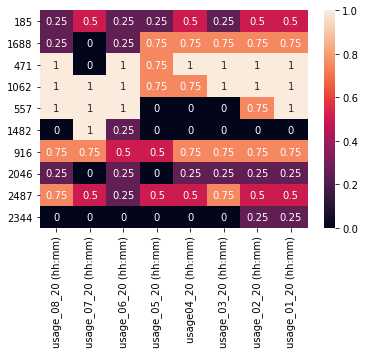

In [15]:
sns.heatmap(tv_usage[usage_cols].sample(n=10), annot=True)

<AxesSubplot:>

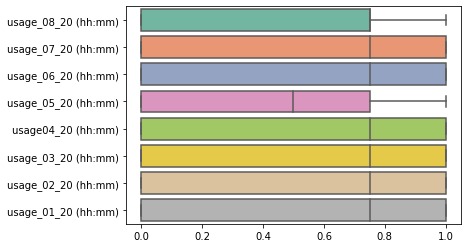

In [16]:
ax = sns.boxplot(data=tv_usage[[x for x in usage_cols]], orient="h", palette="Set2")
ax

<AxesSubplot:ylabel='Density'>

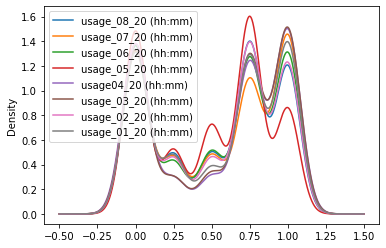

In [17]:
tv_usage[[x for x in usage_cols]].plot(kind = 'density')

In [18]:
tv_usage['Usage_Rating_Scaled'] = tv_usage[usage_cols].sum(axis=1)/len(usage_cols)
tv_usage

,Phone_Number.hash,Peo_TV_Package,usage_08_20 (hh:mm),usage_07_20 (hh:mm),usage_06_20 (hh:mm),usage_05_20 (hh:mm),usage04_20 (hh:mm),usage_03_20 (hh:mm),usage_02_20 (hh:mm),usage_01_20 (hh:mm),,Usage_Rating_Scaled
0,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,0.75,1.00,1.00,1.00,1.00,1.00,0.75,1.00,,0.93750
1,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,0.75,1.00,1.00,1.00,1.00,1.00,0.75,1.00,,0.93750
2,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,0.25,0.25,0.25,0.50,0.75,0.75,0.25,0.25,,0.40625
3,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,0.25,0.25,0.25,0.50,0.75,0.75,0.25,0.25,,0.40625
4,f98bd7d6c96317fc2656bc43441df8bb,PEO_SILVER,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,,0.75000
...,...,...,...,...,...,...,...,...,...,...,...,...
2588,5fc30724801d125e0048b486655723f6,PEO_SILVER,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,,0.75000
2589,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,0.75,0.75,0.75,0.75,1.00,0.75,0.75,0.75,,0.78125
2590,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,0.75,0.75,0.75,0.75,1.00,0.75,0.75,0.75,,0.78125
2591,2ab8436cc34b4f16de3c452300f975c3,PEO_SILVER,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.75,,0.15625


In [19]:
# labling usage bins
bins = [0, 0.33, 0.66,1]
labels = ['LOW','MEDIUM','HIGH']
tv_usage['Usage_Rating_Categorical'] = pd.cut(tv_usage['Usage_Rating_Scaled'], bins=bins, labels=labels)
tv_usage

,Phone_Number.hash,Peo_TV_Package,usage_08_20 (hh:mm),usage_07_20 (hh:mm),usage_06_20 (hh:mm),usage_05_20 (hh:mm),usage04_20 (hh:mm),usage_03_20 (hh:mm),usage_02_20 (hh:mm),usage_01_20 (hh:mm),,Usage_Rating_Scaled,Usage_Rating_Categorical
0,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,0.75,1.00,1.00,1.00,1.00,1.00,0.75,1.00,,0.93750,HIGH
1,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,0.75,1.00,1.00,1.00,1.00,1.00,0.75,1.00,,0.93750,HIGH
2,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,0.25,0.25,0.25,0.50,0.75,0.75,0.25,0.25,,0.40625,MEDIUM
3,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,0.25,0.25,0.25,0.50,0.75,0.75,0.25,0.25,,0.40625,MEDIUM
4,f98bd7d6c96317fc2656bc43441df8bb,PEO_SILVER,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,,0.75000,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2588,5fc30724801d125e0048b486655723f6,PEO_SILVER,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,,0.75000,HIGH
2589,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,0.75,0.75,0.75,0.75,1.00,0.75,0.75,0.75,,0.78125,HIGH
2590,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,0.75,0.75,0.75,0.75,1.00,0.75,0.75,0.75,,0.78125,HIGH
2591,2ab8436cc34b4f16de3c452300f975c3,PEO_SILVER,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.75,,0.15625,LOW


In [20]:
# adding category "NO" 
tv_usage['Usage_Rating_Categorical'] = tv_usage['Usage_Rating_Categorical'].cat.add_categories("NO")
tv_usage.loc[tv_usage['Usage_Rating_Scaled'] == 0.0, 'Usage_Rating_Categorical'] = "NO"
tv_usage[(tv_usage['Usage_Rating_Scaled'] == 0.0)]

,Phone_Number.hash,Peo_TV_Package,usage_08_20 (hh:mm),usage_07_20 (hh:mm),usage_06_20 (hh:mm),usage_05_20 (hh:mm),usage04_20 (hh:mm),usage_03_20 (hh:mm),usage_02_20 (hh:mm),usage_01_20 (hh:mm),,Usage_Rating_Scaled,Usage_Rating_Categorical
6,a41d8c2af7a4d478417f2368ee852296,PEO_UTHAYAM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,NO
17,82dec366d337db00245e0e6963195fb6,PEO_UTHAYAM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,NO
18,82dec366d337db00245e0e6963195fb6,PEO_UTHAYAM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,NO
19,e513ea561737d58fe19c475b14959929,DOUBLEPROMO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,NO
20,e513ea561737d58fe19c475b14959929,DOUBLEPROMO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,62ff1f7426058b9c721aee1b897cd378,PEO_SILVER_PLUS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,NO
2575,ba2cd0a629f9bd5acc9d7fcd89971dad,PEO_SILVER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,NO
2583,043588932b222223b85a714e32f6c1f2,PEO_SILVER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,NO
2586,013736757d2ddad83cdfaa418921605c,PEO_SILVER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,NO


### Fina Result: Usage Ratings

In [21]:
tv_usage

,Phone_Number.hash,Peo_TV_Package,usage_08_20 (hh:mm),usage_07_20 (hh:mm),usage_06_20 (hh:mm),usage_05_20 (hh:mm),usage04_20 (hh:mm),usage_03_20 (hh:mm),usage_02_20 (hh:mm),usage_01_20 (hh:mm),,Usage_Rating_Scaled,Usage_Rating_Categorical
0,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,0.75,1.00,1.00,1.00,1.00,1.00,0.75,1.00,,0.93750,HIGH
1,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,0.75,1.00,1.00,1.00,1.00,1.00,0.75,1.00,,0.93750,HIGH
2,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,0.25,0.25,0.25,0.50,0.75,0.75,0.25,0.25,,0.40625,MEDIUM
3,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,0.25,0.25,0.25,0.50,0.75,0.75,0.25,0.25,,0.40625,MEDIUM
4,f98bd7d6c96317fc2656bc43441df8bb,PEO_SILVER,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,,0.75000,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2588,5fc30724801d125e0048b486655723f6,PEO_SILVER,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,,0.75000,HIGH
2589,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,0.75,0.75,0.75,0.75,1.00,0.75,0.75,0.75,,0.78125,HIGH
2590,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,0.75,0.75,0.75,0.75,1.00,0.75,0.75,0.75,,0.78125,HIGH
2591,2ab8436cc34b4f16de3c452300f975c3,PEO_SILVER,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.75,,0.15625,LOW


In [22]:
tv_usage.to_csv("data/user_profile/PEO_TV_Usage_Categorical_Non_Unique.csv")